In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

In [19]:
def abs_sobel_thres(img, orient = 'x', sobel_kernal = 3, thresh = (0, 255)):
    # Calculate directional gradient
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if('x' == orient):
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernal)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernal)
        
    # Apply threshold
    grad_binary = np.zeros_like(sobel)
    grad_binary[(sobel >= thresh[0]) & (sobel <= thresh[1])] = 1
    return grad_binary

In [20]:
def mag_thresh(img, sobel_kernal = 3, mag_thresh = (0, 255)):
    # Calculate gradient magnitude
    sobelx = abs_sobel_thres(img, orient = 'x', sobel_kernal = sobel_kernal, thresh = mag_thresh)
    sobely = abs_sobel_thres(img, orient = 'y', sobel_kernal = sobel_kernal, thresh = mag_thresh)
    abs_sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
    
    # Apply threshold
    mag_binary = np.zeros_like(abs_sobel)
    mag_binary[(abs_sobel >= mag_thresh[0]) & (abs_sobel <= mag_thresh[1])] = 1
    return mag_binary

In [25]:
def dir_threshold(img, sobel_kernal = 3, thresh = (0, np.pi/2)):
    # Calculate gradient direction
    sobelx = abs_sobel_thres(img, orient = 'x', sobel_kernal = sobel_kernal, thresh = thresh)
    sobely = abs_sobel_thres(img, orient = 'y', sobel_kernal = sobel_kernal, thresh = thresh)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    dir_grad = np.arctan2(abs_sobely, abs_sobelx)
    
    # Apply threshold
    dir_binary = np.zeros_like(dir_grad)
    dir_grad[(dir_grad >= thresh[0]) & (dir_grad <= thresh[1])] = 1
    return dir_binary

In [50]:
# Choose a Sobel kernal size
ksize = 15 # Choose a larger odd number to smooth gradient measurements

In [63]:
# Apply each of the thresholding functions
gradx = abs_sobel_thres(image, orient = 'x', sobel_kernal = ksize, thresh = (0, 100))
grady = abs_sobel_thres(image, orient = 'y', sobel_kernal = ksize, thresh = (0, 255))
mag_binary = mag_thresh(image, sobel_kernal = ksize, mag_thresh = (30, 100))
dir_binary = dir_threshold(image, sobel_kernal = ksize, thresh = (0, 2))

In [64]:
combined = np.zeros_like(dir_binary)
combined[(((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1)))] = 1

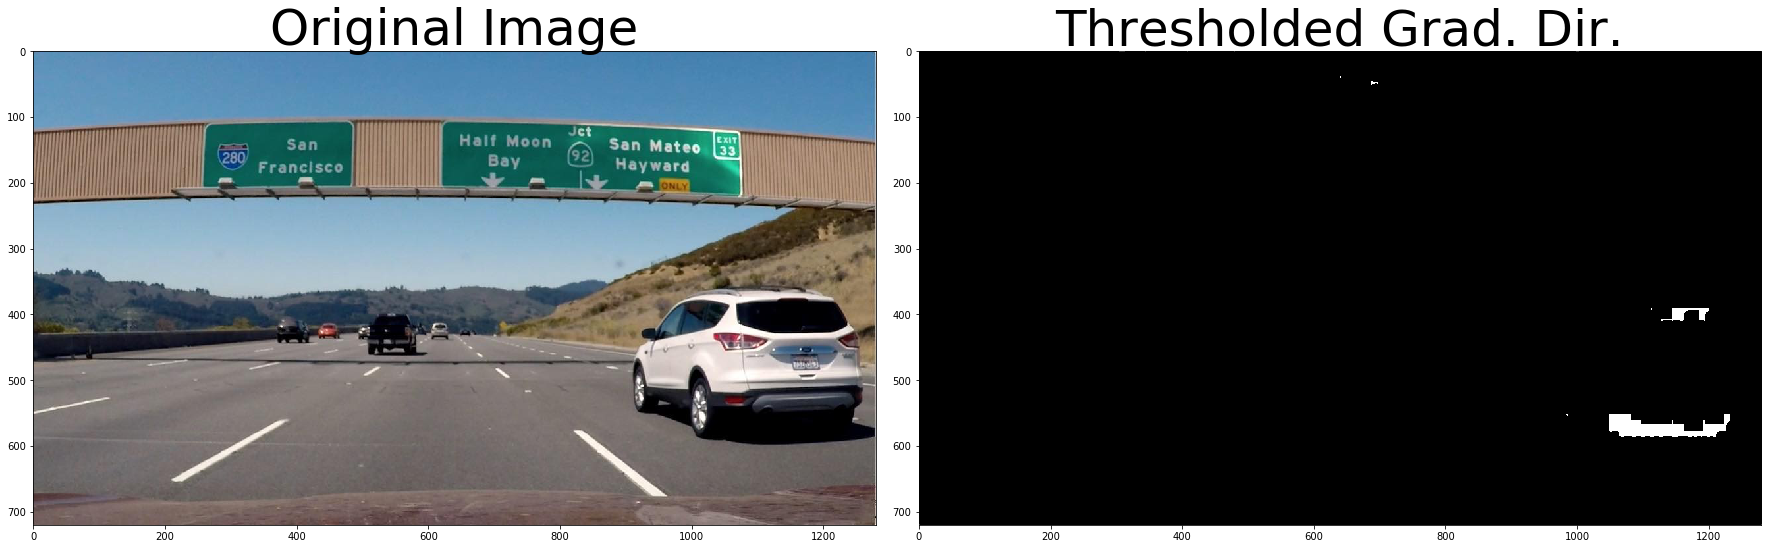

In [65]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(combined, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()